# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Nur-Alhuda Ali

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [5]:
# TODO: Import dataset and inspect the first five columns
data = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [11]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = data.drop(columns=[7])
y = data[7]
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (210, 7)
Shape of y: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

To determine if a Standard Scaler might be a good fit, I have created histogram plots of each feature (below) to see if the features have a Gaussian distribution. Since most of the features do seem to generally be normally distributed, I will implement the Standard Scaler.

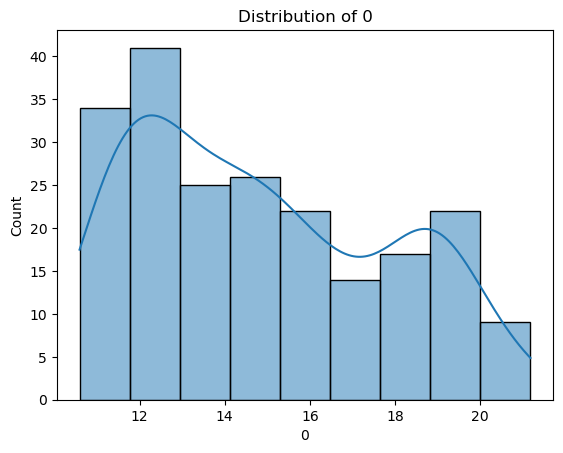

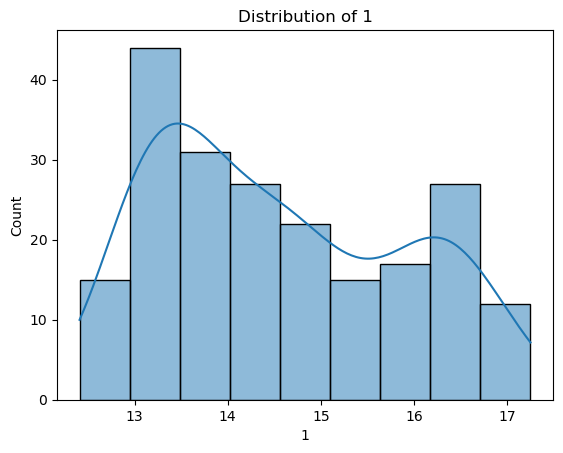

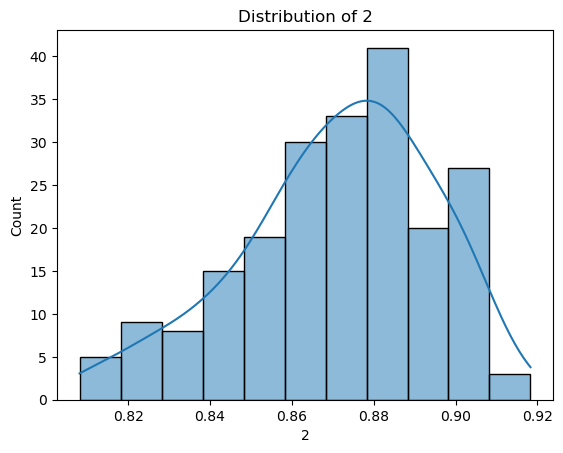

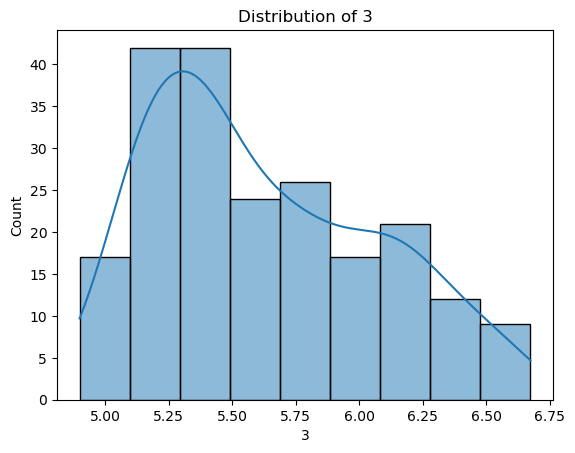

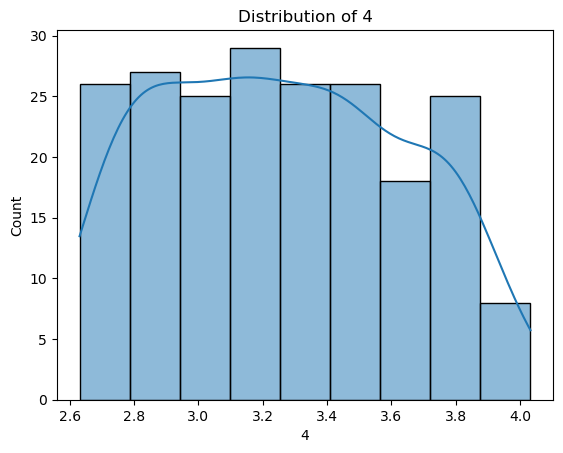

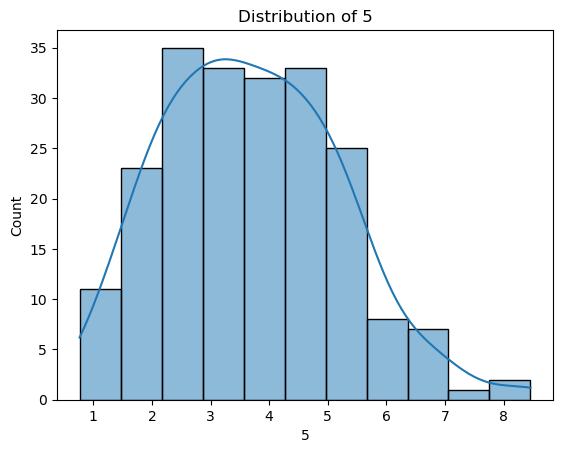

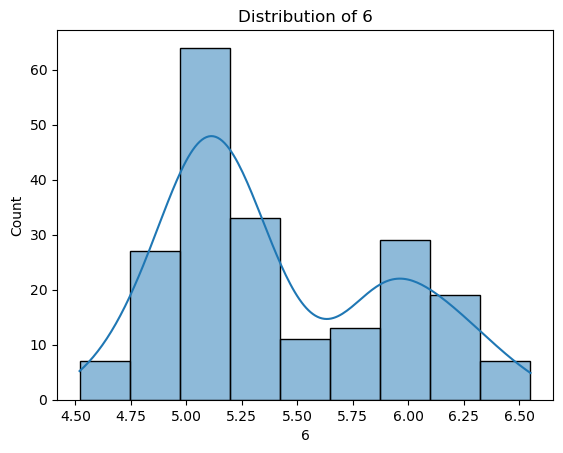

In [13]:
for feature in X.columns:
    # Plot histogram
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

Before we implement the scaler, we need to split the data into training and testing sets first.

In [14]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
# TODO: Print the shape of the training feature matrix and target vector
print(f'Shape of Training Feature Matrix: {X_train.shape}')
print(f'Shape of Training Target Vector: {y_train.shape}')

Shape of Training Feature Matrix: (157, 7)
Shape of Training Target Vector: (157,)


Now that we have our training data, we can implement our selected scaler.

In [24]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # train scaler using the training data

# Scale both the train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [25]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [26]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [49]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV

grid_search_lr = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

print("Logistic Regression Results:")
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search_lr.best_score_))

Logistic Regression Results:
Best parameters: {'C': 10.0, 'fit_intercept': True}
Best cross-validation score: 0.937


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [50]:
# TODO: Predict y labels using best estimator
from sklearn.metrics import accuracy_score

best_lr_model = grid_search_lr.best_estimator_
y_pred = best_lr_model.predict(X_test_scaled)
test_score = accuracy_score(y_test, y_pred)
print('Test Score: {:.3f}'.format(test_score))

Test Score: 0.962


In [51]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
projected_test_data = pca.fit_transform(X_test_scaled) # using the scaled test data

print(f'Original Shape: {X_test_scaled.shape}')
print(f'Reduced Shape: {projected_test_data.shape}')

Original Shape: (53, 7)
Reduced Shape: (53, 2)


Text(0, 0.5, 'Second principal component')

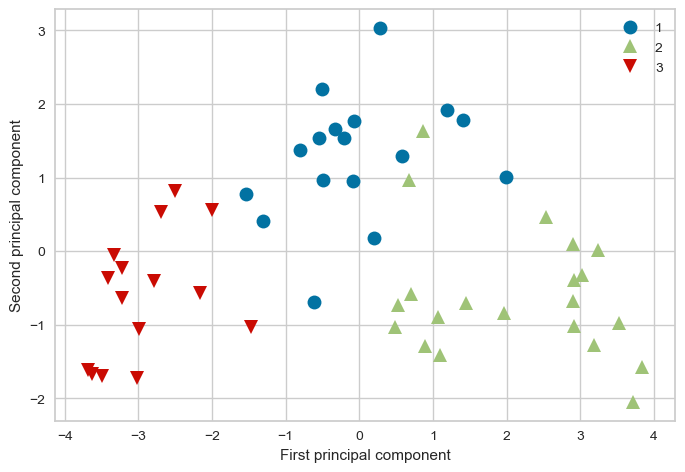

In [70]:
# TODO: Plot test points colored by predicted label
import mglearn

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(projected_test_data[:, 0], projected_test_data[:, 1], y_test)
plt.legend()
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*

A test score of 0.962 indicates that the model generalizes very well on unseen data. In terms of how the model fits the data, there is no underfitting since both the test score and training scores are high, at 0.962 and 0.937, respectively. The model is not overfitted either since there is no big disparity between the scores. 

2. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

Yes, I would say PCA worked well for this model because the plot of the test data in the reduced feature space shows that the classes are well-separated. There is some overlap between classes 1 and 2, but overall, the classes have distinct clusters.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

Up until step 5, I wrote my own code since I have had practice doing steps 1-4 multiple times throughout the semester in assignments and lab work. For the PCA portion of step 5, I used the 'Introduction to PCA' lecture example as reference.

2. In what order did you complete the steps?

I completed the step in order. 

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I did not use generative AI. Any help I had in interpreting the results was from the course textbooks.

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

No, I did not have any challenges with this part of the assignment. Extensive practice from assignments and labs leading up to this assignment, as well as reading the textbook to help me understand PCA more deeply, helped me be successful.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [53]:
# TODO: Scale feature matrix

# Use the standard scaler because k-means clustering uses distances.
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

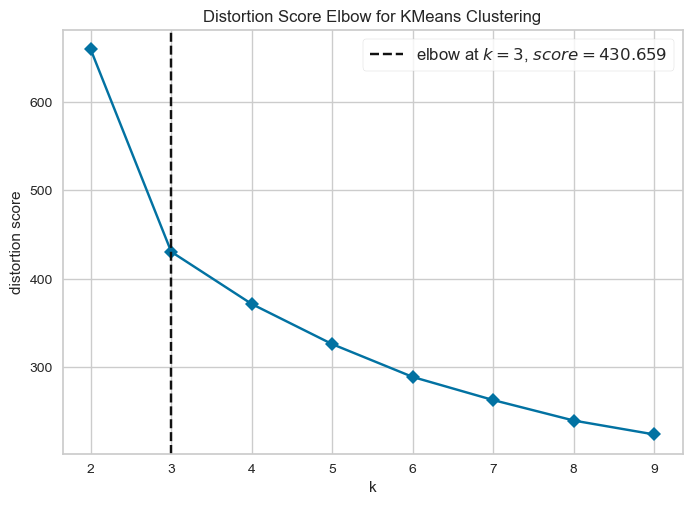

In [54]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

ke = kelbow_visualizer(KMeans(random_state=1, n_init=10), X_scaled, k=(2,10), metric='distortion', timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [74]:
# TODO: Implement K-means with the number of clusters determined in the previous step

# Number of clusters is 3
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_scaled)
labels = kmeans.labels_

/Users/nur-alhudaali/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [75]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_score = silhouette_score(X_scaled, labels)
print("Silhouette Score: {:.2f}".format(sil_score))

ch_score = calinski_harabasz_score(X_scaled, labels)
print("Calinski-Harabasz Score Score: {:.0f}".format(ch_score))

db_score = davies_bouldin_score(X_scaled, labels)
print("Davies-Bouldin Score: {:.2f}".format(db_score))

Silhouette Score: 0.40
Calinski-Harabasz Score Score: 250
Davies-Bouldin Score: 0.93


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

Text(0, 0.5, 'Second principal component')

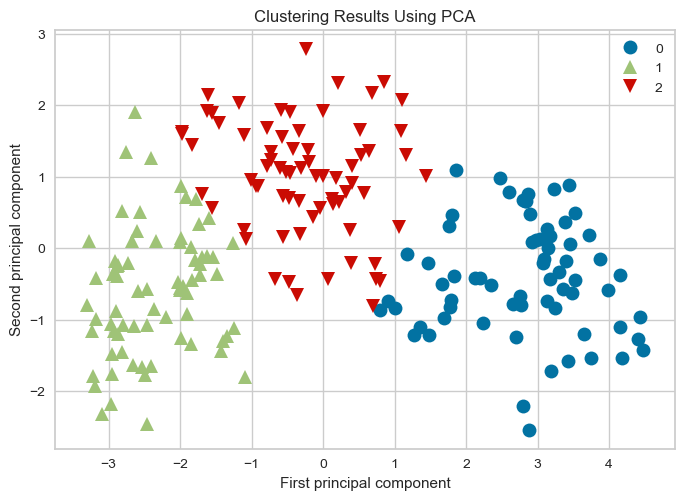

In [77]:
# TODO: Plot clustering results
from sklearn.decomposition import PCA
import mglearn

pca2 = PCA(n_components=2)
pca2.fit(X_scaled)
data_2D = pca2.transform(X_scaled)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(data_2D[:, 0], data_2D[:, 1], labels)
plt.legend()
plt.gca().set_aspect("equal")
plt.title('Clustering Results Using PCA')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [99]:
# TODO: Find the number of principal components using explained variance ratio

pca_2D = PCA(n_components=2)
pca_2D.fit(X_scaled)
explained_variance_ratios_2D = pca_2D.explained_variance_ratio_
print(explained_variance_ratios_2D)
print('Sum of Explained Variance Ratios Using 2 Components: {:.2f}'.format(sum(explained_variance_ratios_2D)))
print()

pca_3D = PCA(n_components=3)
pca_3D.fit(X_scaled)
explained_variance_ratios_3D = pca_3D.explained_variance_ratio_
print(explained_variance_ratios_3D)
print('Sum of Explained Variance Ratios Using 3 Components: {:.2f}'.format(sum(explained_variance_ratios_3D)))

# 2 components only explain 89% of the variance.
# 3 components explain 99% of the variance. Use 3 components.

[0.71874303 0.17108184]
Sum of Explained Variance Ratios Using 2 Components: 0.89

[0.71874303 0.17108184 0.09685763]
Sum of Explained Variance Ratios Using 3 Components: 0.99


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [100]:
# TODO: Use PCA to transform the data
X_transformed_3D = pca_3D.transform(X_scaled)

In [102]:
# TODO: Implement K-means with the transformed data

# Number of clusters is 3, as previously determined using the elbow method.
kmeans_transformed = KMeans(n_clusters=3, random_state=1)
kmeans_transformed.fit(X_transformed_3D)
labels_trans = kmeans_transformed.labels_

/Users/nur-alhudaali/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [103]:
# TODO: Calculate the three different validation metrics
sil_score2 = silhouette_score(X_transformed_3D, labels_trans)
print("Silhouette Score After PCA Transformation: {:.2f}".format(sil_score2))

ch_score2 = calinski_harabasz_score(X_transformed_3D, labels_trans)
print("Calinski-Harabasz Score After PCA Transformation: {:.0f}".format(ch_score2))

db_score2 = davies_bouldin_score(X_transformed_3D, labels_trans)
print("Davies-Bouldin Score After PCA Transformation: {:.2f}".format(db_score2))

Silhouette Score After PCA Transformation: 0.41
Calinski-Harabasz Score After PCA Transformation: 260
Davies-Bouldin Score After PCA Transformation: 0.90


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [106]:
# TODO: Display results
results_dict = dict()
results_dict = {
    'Before PCA Transformation': [sil_score, ch_score, db_score],
    'After PCA Transformation': [sil_score2, ch_score2, db_score2]
}

results = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
display(results)

,Silhouette,Calinski-Harabasz,Davies-Bouldin
Before PCA Transformation,0.400727,249.784175,0.927871
After PCA Transformation,0.410082,260.288507,0.903069


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*

Yes, in the dataset there are 3 classes as confirmed in Part 1 of the assignment. So the optimal number of clusters determined in Part 2 matches up.

2. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*

Yes, the number and distribution of the classes were very similar in the PCA plots from parts 1 and 2.

3. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*

I used 3 components for the PCA analysis in Part 2, Step 2. I computed the total explained variance ratio by summing up the individual explained variance ratios for each components and the total added up to 0.99, which means that 3 components explain 99% of the variance. Using only 2 components explains only 89% of the variance, which didn't meet the 95% threshold.

Using PCA slightly improved the silhouette score from 0.40 to 0.41, and higher scores closer to +1 indicate well-separated clusters. The Calinski-Harabasz score was also improved from 250 to 260, with higher scores for this metric also indicating better-defined clusters. Finally, the Davies-Bouldin score also improved from 0.93 to 0.90, with scores closer to zero indicating better partitioning of the data. Overall, the PCA analysis did slightly improve my results.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

Since I wasn't very familiar with the code for Part 2 of this assignment, I referenced the lecture and lab examples for PCA and K-means clustering.

2. In what order did you complete the steps?

I completed all the steps in order.

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I used generative AI to confirm my understanding of how to use explained variance ratios to calculate the required number of components in PCA analysis using the following prompt, "If I need a certain level of variance to be explained by the components in PCA analysis, do I simply calculate the sum of the individual explained variance ratios for each component and ensure they add up to the required threshold?" No I did not need to modify any code due to using generative AI - I only used to to make sure my understanding was correct.

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

No, I did not have any challenges. Reading the lecture slides and textbook, as well as going through the lecture and lab examples relevant to this assignment, helped me be successful.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


I liked trying unsupervised learning in Part 2 of this assignment. I feel like I understand it better now and it motivated me to continue to explore other unsupervised learning models on my own time.